<a href="https://colab.research.google.com/github/nitinranjansharma/GCP_course/blob/master/Tensorflow2.0%20_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0-alpha0

In [2]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [3]:
print(np.__version__)

1.14.6


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
set(list(test_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

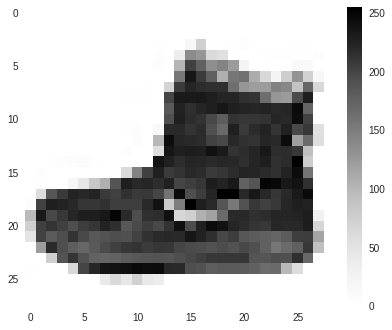

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.colorbar()
plt.show()

In [25]:
print(np.max(train_images[0].flatten()))
print(np.min(train_images[0].flatten()))

255
0


In [0]:
#normalizing the data for nn compatible
train_images = train_images/255
test_images = test_images/255

In [27]:
print(np.max(train_images[0].flatten()))
print(np.min(train_images[0].flatten()))

1.0
0.0


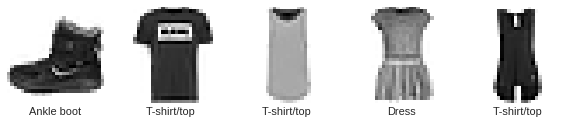

In [31]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
#building simple model for classification
#output layer - > 10
# input layer - > 28*28 = 128

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1990 - accuracy: 0.9255
Epoch 2/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1959 - accuracy: 0.9262
Epoch 3/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1877 - accuracy: 0.9284
Epoch 4/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1871 - accuracy: 0.9286
Epoch 5/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1816 - accuracy: 0.9306
Epoch 6/20
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1779 - accuracy: 0.9326
Epoch 7/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1739 - accuracy: 0.9333
Epoch 8/20
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1695 - accuracy: 0.9351
Epoch 9/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1672 - accuracy: 0.9366
Epoch 10/20
60000/60000 [=========

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.4406 - accuracy: 0.8904


In [39]:
print(test_acc)

0.8904


In [0]:
predictions = model.predict(test_images)

In [42]:
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9
